1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

eigenvalues:  [2.91620171e+01+0.j 1.11385146e-15+0.j 2.07667804e+00+0.j]
eigenvectors:
 [[-0.11986745 -0.81649658  0.56476998]
 [-0.57183169 -0.40824829 -0.71157702]
 [-0.81156658  0.40824829  0.41796294]]

eigenvalues using SVD:  [2.92276733e+01 2.07724765e+00 1.74888306e-31]
eigenvectors using SVD:
 [[-0.11974008  0.564797   -0.81649658]
 [-0.57199214 -0.71144805 -0.40824829]
 [-0.81147231  0.41814594  0.40824829]]

By keeping the first 2 principal components,the percent of the total variability explained is: 1.0
By keeping only the first principal component,the percent of the total variability explained is: 0.9336446926503771

Data in the new coordiantes:
 [[ 5.59950979e+00  4.99623271e+00 -4.59155467e+00 ...  6.66664074e-01
   5.75785743e+00 -6.93484475e+00]
 [ 1.41845110e+00  9.20975736e-01 -3.86888702e-01 ... -7.49550547e-01
  -1.86263456e+00  1.92623485e+00]
 [-8.88178420e-16 -8.88178420e-16  6.66133815e-16 ...  2.77555756e-16
   4.44089210e-16  0.00000000e+00]]


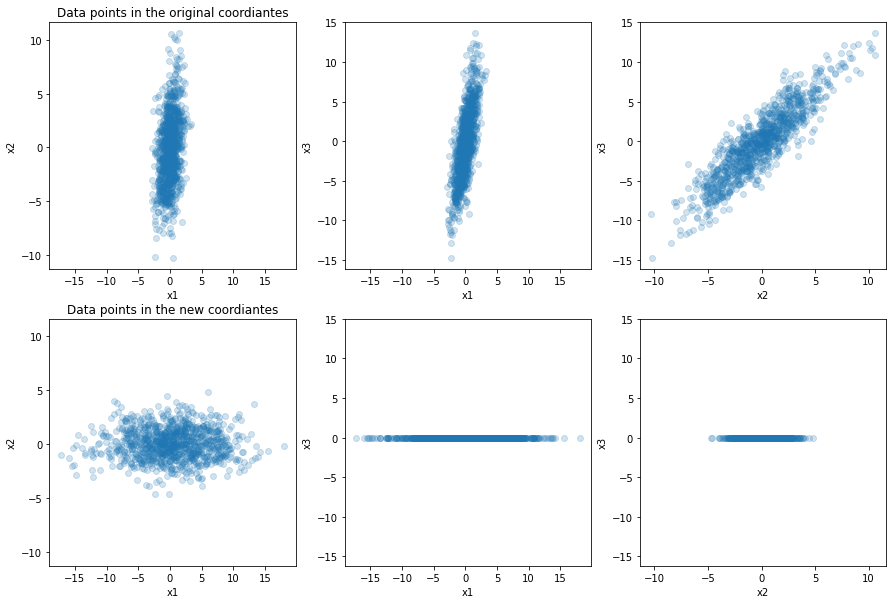

In [2]:
N=1000
x1 = np.random.normal(loc=0, scale=1, size=N)
x2 = x1 + np.random.normal(loc=0, scale=3, size=N)
x3 = 2*x1 + x2

x = np.array([x1,x2,x3])

#the eigenvectors and eigenvalues of the covariance matrix of the dataset
l, V = la.eig(np.cov(x))
print ("eigenvalues: ",l)
print ("eigenvectors:\n",V)

#eigenvectors and eigenvalues using SVD
#U, spectrum, Vt = la.svd(np.cov(x))
U, spectrum, Vt = la.svd(x)
print ("\neigenvalues using SVD: ",spectrum**2/(N-1))
print ("eigenvectors using SVD:\n",U) 


#What percent of the total dataset's variability is explained by the principal components? 
Lambda=np.diag(np.sort(spectrum**2/(N-1))[::-1])
#print ("\n",Lambda)

print("\nBy keeping the first 2 principal components,the percent of the total variability explained is:",
      (Lambda[0,0]+Lambda[1,1])/Lambda.trace())
#This makes sense because the third variable of the dataset is a linear combination of the other two 
print("By keeping only the first principal component,the percent of the total variability explained is:",
      (Lambda[0,0])/Lambda.trace())


# rotate all the data points accordingly to the new base
x_rot = np.dot(U.T, x)
print("\nData in the new coordiantes:\n",x_rot)
#Now we can reducing the dimesionality by taking in consideration only the values corrisponding to the
#first principal components


#Plot the data points in the original and the new coordiantes as a set of scatter plots. 

fig = plt.figure(figsize = (15,10))
plt01 = fig.add_subplot(2, 3, 1)
plt02 = fig.add_subplot(2, 3, 2)
plt12 = fig.add_subplot(2, 3, 3)
plt01_rot = fig.add_subplot(2, 3, 4, sharex = plt01, sharey = plt01)
plt02_rot = fig.add_subplot(2, 3, 5, sharex = plt02, sharey = plt02)
plt12_rot = fig.add_subplot(2, 3, 6, sharex = plt12, sharey = plt12)


plt01.scatter(x[0,:], x[1,:], alpha = 0.2)
plt01.set_title('Data points in the original coordiantes')
plt01.set_xlabel("x1")
plt01.set_ylabel("x2")

plt02.scatter(x[0,:], x[2,:], alpha = 0.2)
plt02.set_xlabel("x1")
plt02.set_ylabel("x3")

plt12.scatter(x[1,:], x[2,:], alpha = 0.2)
plt12.set_xlabel("x2")
plt12.set_ylabel("x3")


plt01_rot.scatter(x_rot[0,:], x_rot[1,:], alpha = 0.2)
plt01_rot.set_title('Data points in the new coordiantes')
plt01_rot.set_xlabel("x1")
plt01_rot.set_ylabel("x2")

plt02_rot.scatter(x_rot[0,:], x_rot[2,:], alpha = 0.2)
plt02_rot.set_xlabel("x1")
plt02_rot.set_ylabel("x3")

plt12_rot.scatter(x_rot[1,:], x_rot[2,:], alpha = 0.2)
plt12_rot.set_xlabel("x2")
plt12_rot.set_ylabel("x3")


plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

eigenvalues:  [2.92277765e+01+0.j 2.11726499e-02+0.j 2.10273709e+00+0.j]
eigenvectors:
 [[-0.12015718 -0.82142478  0.55751555]
 [-0.57125195 -0.40208729 -0.71553967]
 [-0.81193193  0.40445908  0.42092683]]

eigenvalues using SVD:  [2.92897600e+01 2.10317466e+00 2.11738220e-02]
eigenvectors using SVD:
 [[-0.12004269  0.55754752 -0.82141982]
 [-0.57138546 -0.71542573 -0.40210034]
 [-0.81185492  0.42107813  0.40445617]]

By keeping the first 2 principal components,the percent of the total variability explained is: 0.999325977306707
By keeping only the first principal component,the percent of the total variability explained is: 0.9323759740126725


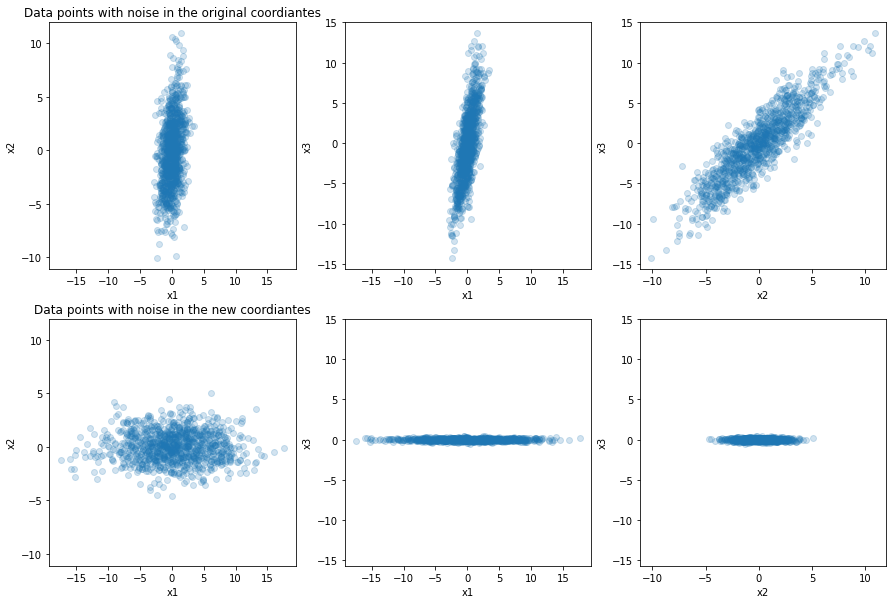

In [3]:
x1_noise = x1 + np.sum(np.random.normal(loc = 0, scale = x1.std()/50, size = (N,10)), axis = 1)
x2_noise = x2 + np.sum(np.random.normal(loc = 0, scale = x2.std()/50, size = (N,10)), axis = 1)
x3_noise = x3 + np.sum(np.random.normal(loc = 0, scale = x3.std()/50, size = (N,10)), axis = 1)

x_noise = np.array([x1_noise, x2_noise, x3_noise])

#the eigenvectors and eigenvalues of the covariance matrix of the dataset
l, V = la.eig(np.cov(x_noise))
print ("eigenvalues: ",l)
print ("eigenvectors:\n",V)

#eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(x_noise)
print ("\neigenvalues using SVD: ",spectrum**2/(N-1))
print ("eigenvectors using SVD:\n",U) 


#What percent of the total dataset's variability is explained by the principal components? 
Lambda=np.diag(np.sort(spectrum**2/(N-1))[::-1])
#print ("\n",Lambda)

print("\nBy keeping the first 2 principal components,the percent of the total variability explained is:",
      (Lambda[0,0]+Lambda[1,1])/Lambda.trace())
print("By keeping only the first principal component,the percent of the total variability explained is:",
      (Lambda[0,0])/Lambda.trace())


# rotate all the data points accordingly to the new base
x_noise_rot = np.dot(U.T, x_noise)
#print("\nData in the new coordiantes:\n",xp)
#Now we can reducing the dimesionality by taking in consideration only the values corrisponding to the
#first principal components


#Plot the data points in the original and the new coordiantes as a set of scatter plots. 
fig = plt.figure(figsize = (15,10))
plt01 = fig.add_subplot(2, 3, 1)
plt02 = fig.add_subplot(2, 3, 2)
plt12 = fig.add_subplot(2, 3, 3)
plt01_rot = fig.add_subplot(2, 3, 4, sharex = plt01, sharey = plt01)
plt02_rot = fig.add_subplot(2, 3, 5, sharex = plt02, sharey = plt02)
plt12_rot = fig.add_subplot(2, 3, 6, sharex = plt12, sharey = plt12)


plt01.scatter(x_noise[0,:], x_noise[1,:], alpha = 0.2)
plt01.set_title('Data points with noise in the original coordiantes')
plt01.set_xlabel("x1")
plt01.set_ylabel("x2")

plt02.scatter(x_noise[0,:], x_noise[2,:], alpha = 0.2)
plt02.set_xlabel("x1")
plt02.set_ylabel("x3")

plt12.scatter(x_noise[1,:], x_noise[2,:], alpha = 0.2)
plt12.set_xlabel("x2")
plt12.set_ylabel("x3")


plt01_rot.scatter(x_noise_rot[0,:], x_noise_rot[1,:], alpha = 0.2)
plt01_rot.set_title('Data points with noise in the new coordiantes')
plt01_rot.set_xlabel("x1")
plt01_rot.set_ylabel("x2")

plt02_rot.scatter(x_noise_rot[0,:], x_noise_rot[2,:], alpha = 0.2)
plt02_rot.set_xlabel("x1")
plt02_rot.set_ylabel("x3")

plt12_rot.scatter(x_noise_rot[1,:], x_noise_rot[2,:], alpha = 0.2)
plt12_rot.set_xlabel("x2")
plt12_rot.set_ylabel("x3")


plt.show()

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 